<!-- IMPORT  LIBRARIES  -->

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# NOW CEART A DATA FRAME AND LOAD ZOMATO DATA FILE

In [3]:
df  = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
# DATA CLEANING PART

In [ ]:
# CONVERT THE DATA TYPE OF COLUMN-- RATE (WE WANT 4.1 INSTED OF 4.1/5) 

In [ ]:
# WE WILL CREAT USER DEFINED FUNCTION AND APPLY IT ON WHOLE COLUMN WITH APPLY FUNCTION.

In [6]:
def ConvertRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
df["rate"] = df["rate"].apply(ConvertRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
# TO CHECK INFORMATION OF COLUMNS WE CAN USE INFO FUNCTIONS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


1) What type of restaurant do the majority of customers order from?

In [ ]:
# NOW WE WILL CREATE TYPE OF RESTURENT WE HAVE BY COUNT PLOT

Text(0.5, 0, 'Type of resturent')

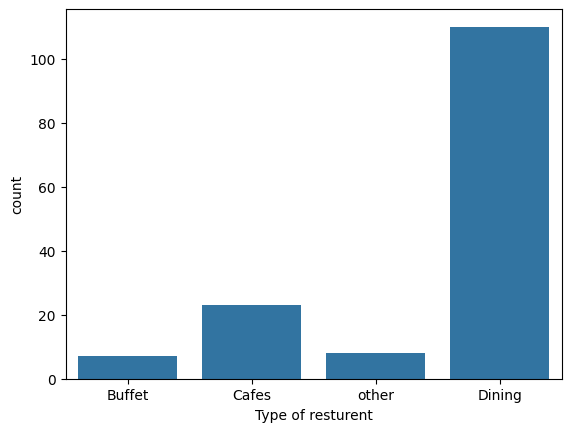

In [45]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel("Type of resturent")

In [ ]:
# CONCLUSIN OF ABOVE CHART IS  -- MAJORITY OF RESTURENTS FALLS IN DINNING  CATEGORY

2) How many votes has each type of restaurant received from customers?

In [ ]:
# NOW WE CREATE LINE CHART BY USING GROUP BY FUNCTION ON (LISTED IN TYPE) COLUMN AND USING SUM FUNCION ON (VOTES) COLUMN

Text(0, 0.5, 'votes')

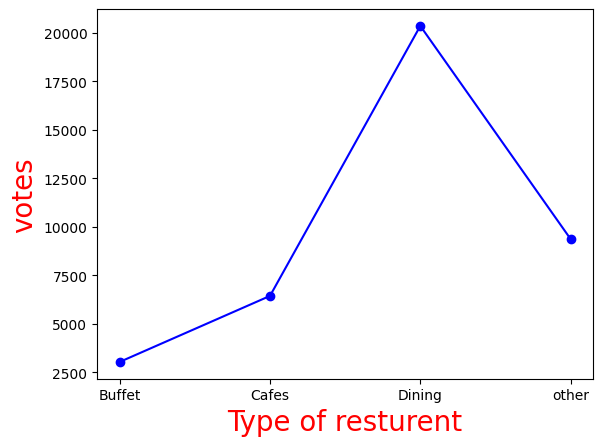

In [49]:
grouped_data = df.groupby('listed_in(type)')["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result , c = "blue", marker = "o" )
plt.xlabel("Type of resturent" , c = "red", size = 20)
plt.ylabel("votes", c = "red", size = 20)

In [ ]:
# CONCLUSION OF ABOVE CHARTS IS -- DINNING RESTURANTS HAS RECIEVED MAXIMUM VOTES

3) What are the ratings that the majority of restaurants have received?

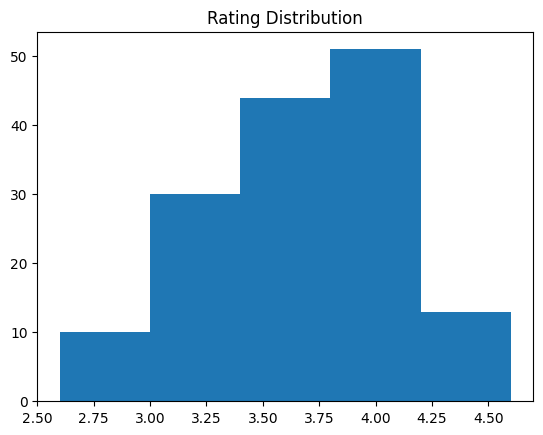

In [51]:
plt.hist(df["rate"],bins = 5)
plt.title("Rating Distribution")
plt.show()

In [ ]:
# CONCLUSION OF ABOVE CHART IS --  THE MAJORITY OF THE RESTURANTS HAVE RECIEVED RATINGS BETWEEN 3.5 TO 4

4)Zomato has observed that most couples order most of their food online. What is their
average spending on each order?

In [ ]:
# WE WILL USE COUNTPLOT TO SEE COUNT IN  VISUALIZATION FORM

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

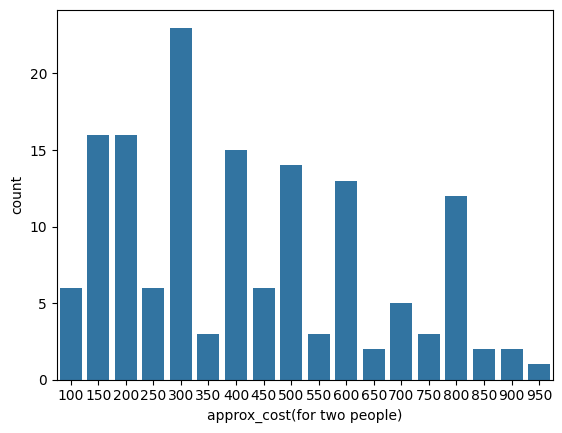

In [53]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x = couple_data)

In [ ]:
# CONCLUSION OF ABOVE CHART IS --  The Majority of couples preferrs resturant with an approximate cost of 300rs

5) Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

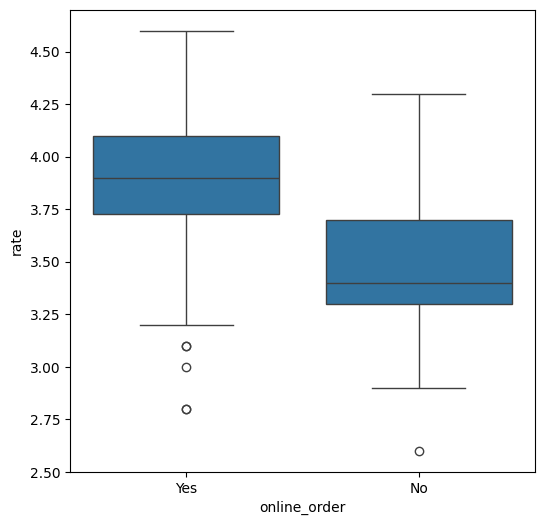

In [61]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate' , data = df)

In [ ]:
# CONCLUSION OF ABOVE CHART IS --   Above graph shows that Offline Orders recieved lower ratings as Compaire to Online Orders

In [ ]:
# 6) Which type of restaurant received more offline orders, so that Zomato can provide those
 # customers with some good offers?

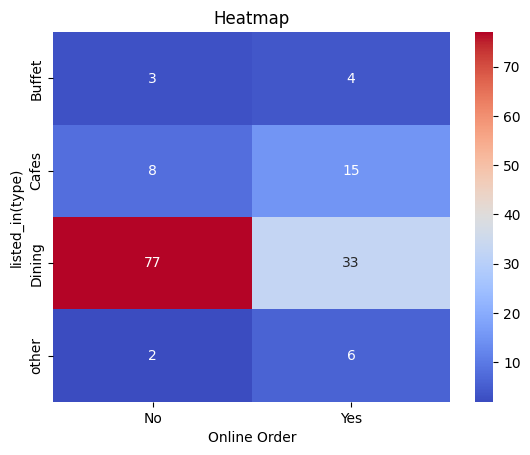

In [68]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order' , aggfunc = 'size' , fill_value = 0)
sns.heatmap(pivot_table , annot = True  , cmap = 'coolwarm' , fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel('listed_in(type)')
plt.show()

In [ ]:
# # CONCLUSION OF ABOVE CHART IS --   Above graph shows that Dinning resturants Primarily recieved offline Orders 
# and Cafe Primarily recieved Online Orders. 
# So this Suggest that People prefers orders in person at resturants,but Online Ordering in Cafe.
